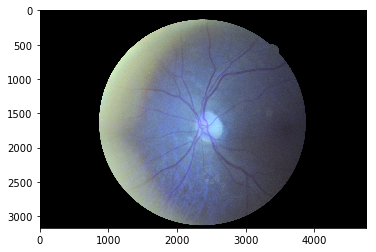

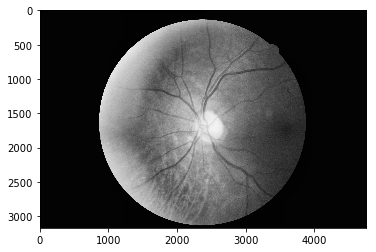

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

direct = '/media/eslam/7AE0CA83E0CA455B/Users/Eslam100/Documents/kaggledataset/train/10_left.jpeg'
img = cv2.imread(direct)
plt.imshow(img)
plt.show()

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(4,4))
cl1 = clahe.apply(gray_image)
again = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)
plt.imshow(again)
plt.show()

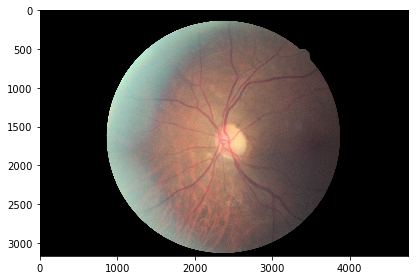

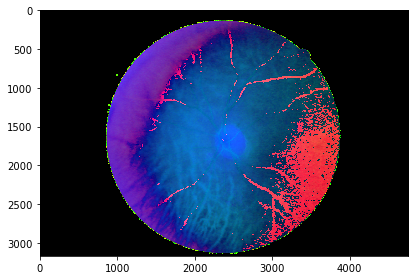

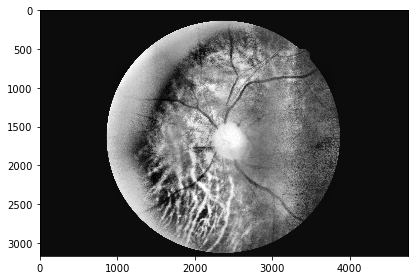

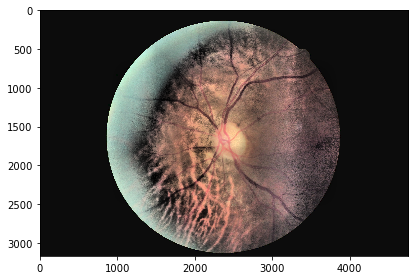

In [6]:
from skimage import data, io, filters, color, exposure
import copy
direct = '/media/eslam/7AE0CA83E0CA455B/Users/Eslam100/Documents/kaggledataset/train/10_left.jpeg'

img = io.imread(direct)
io.imshow(img)
io.show()

img_hsvcolor=color.rgb2hsv(img)
io.imshow(img_hsvcolor)
io.show()

#temp_img = img_hsvcolor.copy()
#temp_img[:,:,0]=0
#temp_img[:,:,1]=0
contrasted_img = exposure.equalize_adapthist(img_hsvcolor[:,:,2], clip_limit=0.05)
img_hsvcolor[:,:,2]=contrasted_img
io.imshow(contrasted_img)
io.show()

img = color.hsv2rgb(img_hsvcolor)
io.imshow(img)
io.show()


In [10]:
import cv2
import numpy as np
img1=cv2.imread(direct)
img2=io.imread(direct)
print(img1.shape)
print(img2.shape)

(3168, 4752, 3)
(3168, 4752, 3)


# CLAHE code

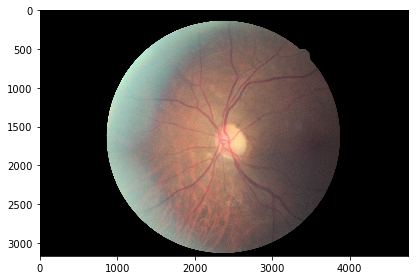

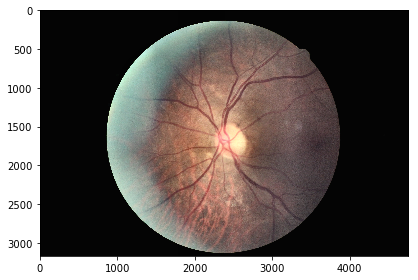

In [13]:
import cv2
import numpy as np
from skimage import io


bgr = io.imread(direct)
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)


# Preparing directory 

In [49]:
import os 
import cv2
from skimage import io
import numpy as np


def preProcessing():
    path = '/media/eslam/7AE0CA83E0CA455B/Users/Eslam100/Documents/kaggledataset/test/'
    output_path = '/media/eslam/129A97369A9714F7/DR_clahe/test/'

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

    for img_path in os.listdir(path):

        input_path = os.path.join(path,img_path)
        img = io.imread(input_path)
        
        #CLAHE
        lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        lab_planes = cv2.split(lab_img)  
        lab_planes[0] = clahe.apply(lab_planes[0])
        lab_img = cv2.merge(lab_planes)
        img = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)
        
        #Cropping
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,11,2)[1]
        mask = thresh>100
        img = img[np.ix_(mask.any(1),mask.any(0))][::-1,:,:]
        full_path=os.path.join(output_path, img_path)
        #io.imsave(full_path,img)
        cv2.imwrite(full_path,img[:,:,::-1])
        
        

    

In [ ]:
preProcessing()

In [ ]:
print()